# Tutorial

You will solve the following problem using a computer to do some of the
more tedious calculations.

````{admonition} Problem

Anna is investigating the relationship between exercise and resting
heart rate. She takes a of 19 people in her year group and records for
each person

-   their resting heart rate, $h$ beats per minute.
-   the number of minutes, $m$, spent exercising each week.

A table with the data is here:

```{list-table} Collected data from Anna's year group.
:header-rows: 1

* - h
  - m
* - 76.0
  - 5
* - 72.0
  - 5
* - 71.0
  - 21
* - 74.0
  - 30
* - 71.0
  - 42
* - 69.0
  - 20
* - 68.0
  - 20
* - 68.0
  - 35
* - 66
  - 80.0
* - 64
  - 120.0
* - 65
  - 140.0
* - 63
  - 180.0
* - 63
  - 205.0
* - 62
  - 225.0
* - 65
  - 237.0
* - 63
  - 280.0
* - 65
  - 300.0
* - 64
  - 356.0
* - 64
  - 360.0
```

You can see a scatter plot below.

1.  For all collected values of $h$ and $m$ obtain:

    -   The mean
    -   The median
    -   The quartiles
    -   The standard deviation
    -   The variation
    -   The maximum
    -   The minimum
2.  Obtain the Pearson Coefficient of correlation for the variables $h$
    and $m$.
3.  Obtain the line of best fit for variables $x$ and $y$ as defined by:
    $$\begin{split}x=\ln(m)\qquad y=\ln(h)\end{split}$$
4.  Using the above obtain a relationship between $m$ and $h$ of the
    form: $$\begin{split}h=cm^k\end{split}$$
````

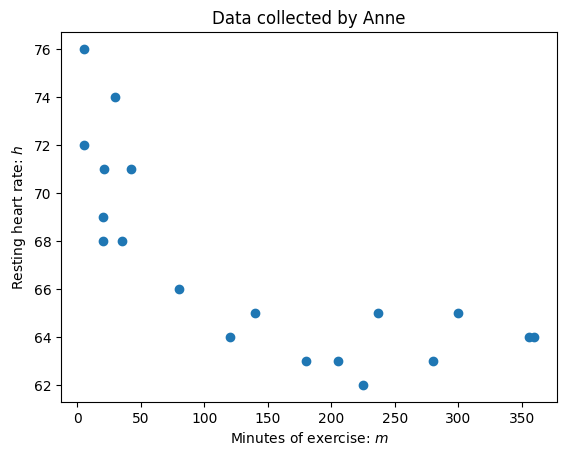

In [1]:
import matplotlib.pyplot as plt

h_data = (
    76.0,
    72.0,
    71.0,
    74.0,
    71.0,
    69.0,
    68.0,
    68.0,
    66.0,
    64.0,
    65.0,
    63.0,
    63.0,
    62.0,
    65.0,
    63.0,
    65.0,
    64.0,
    64.0,
)
m_data = (
    5,
    5,
    21,
    30,
    42,
    20,
    20,
    35,
    80,
    120,
    140,
    180,
    205,
    225,
    237,
    280,
    300,
    356,
    360,
)

plt.figure()
plt.scatter(x=m_data, y=h_data)
plt.xlabel("Minutes of exercise: $m$")
plt.ylabel("Resting heart rate: $h$")
plt.title("Data collected by Anne");

Start by inputting all the data:

In [2]:
h = (
    76.0,
    72.0,
    71.0,
    74.0,
    71.0,
    69.0,
    68.0,
    68.0,
    66.0,
    64.0,
    65.0,
    63.0,
    63.0,
    62.0,
    65.0,
    63.0,
    65.0,
    64.0,
    64.0,
)
m = (
    5,
    5,
    21,
    30,
    42,
    20,
    20,
    35,
    80,
    120,
    140,
    180,
    205,
    225,
    237,
    280,
    300,
    356,
    360,
)

The main tool you are going to use for this is `statistics`.

In [3]:
import statistics as st

To calculate the mean:

In [4]:
st.mean(h)

67.0

In [5]:
st.mean(m)

140.05263157894737

To calculate the median:

In [6]:
st.median(h)

65.0

In [7]:
st.median(m)

120

To calculate the quartiles, use `statistics.quantiles` and specify that you
want to separate the date in to $n=4$ quarters.

In [8]:
st.quantiles(h, n=4)

[64.0, 65.0, 71.0]

In [9]:
st.quantiles(m, n=4)

[21.0, 120.0, 237.0]

Note that this calculation confirms the median which corresponds to the
50% quartile. To calculate the sample standard deviation:

In [10]:
st.stdev(h)

4.123105625617661

In [11]:
st.stdev(m)

124.46662813970593

To calculate the sample variance:

In [12]:
st.variance(h)

17.0

In [13]:
st.variance(m)

15491.941520467837

To compute that maximum:

In [14]:
max(h)

76.0

In [15]:
max(m)

360

To compute the minimum:

In [16]:
min(h)

62.0

In [17]:
min(m)

5

In order to compute the Pearson Coefficient of correlation use
`statistics.correlation`:

In [18]:
st.correlation(h, m)

-0.7686142969026402

This negative value indicates a negative correlation between $h$ and $m$,
indicating that the more you exercise the lower your heart rate is likely to be.

To calculate the line of best fit for the transformed variables we need to first
create them. We will do this using a list comprehension. As you are doing
everything numerically, we will use `math.log` which by default computes the
natural logarithm:

In [19]:
import math
x = [math.log(value) for value in m]
y = [math.log(value) for value in h]

Now to compute the line of best fit use `statistics.linear_regression`:

In [20]:
slope, intercept = st.linear_regression(x, y)

The slope is:

In [21]:
slope

-0.03854770754231997

The intercept is:

In [22]:
intercept

4.368415819445762

Recall the transformation of the variables:

$$x=\ln(m)\qquad y=\ln(h)$$

You now have the relationship:

$$y=ax + b$$

Where $a$ corresponds to the `slope` and $b$ corresponds to the `intercept`.

The question asks for a relationship between $m$ and $h$ of the form:

$$h=cm^k$$

You can use `sympy` to manipulate the expressions:

In [23]:
import sympy as sym

h = sym.Symbol("h")
m = sym.Symbol("m")
a = sym.Symbol("a")
b = sym.Symbol("b")
x = sym.ln(m)
y = sym.ln(h)

A general line of best fit for $x$ and $y$ can be expressed in terms of $m$ and
$h$:

In [24]:
line = sym.Eq(lhs=y, rhs=a * x + b)
line

Eq(log(h), a*log(m) + b)

Taking the exponential of both sides gives the required relationship:

In [25]:
sym.exp(line.lhs)

h

In [26]:
sym.expand(sym.exp(line.rhs))

exp(b)*exp(a*log(m))

Which can be rewritten as:

$$
e^bm^a
$$

Substituting our values for the `slope` and `intercept` in to these expressions
gives the required relationship:

In [27]:
sym.exp(line.rhs).subs({a: slope, b: intercept})

78.9185114479915/m**0.03854770754232

Below is a plot that shows this relationship:

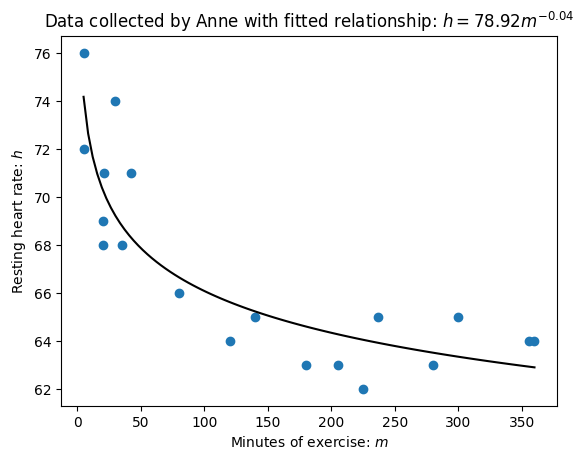

In [28]:
import matplotlib.pyplot as plt
import numpy as np

m_range = np.linspace(np.min(m_data), np.max(m_data), 100)
relationship_image = np.exp(intercept) * m_range ** (slope)

plt.figure()
plt.scatter(x=m_data, y=h_data)
plt.plot(m_range, relationship_image, color="black")
plt.xlabel("Minutes of exercise: $m$")
plt.ylabel("Resting heart rate: $h$")
plt.title(f"Data collected by Anne with fitted relationship: $h={np.exp(intercept):.2f}m^{{{slope:.2f}}}$");

```{important}
In this tutorial you have

- Calulated values of central tendency and spread;
- Calculated some bivariate coefficient;
- Fitted a line of best fit.
```